# Import

In [1]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

  Preparing metadata (setup.py) ... done


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.models import Model, Sequential

import seaborn as sns
import glob
import random
from sklearn.utils import resample
import scipy.stats as stats

# 1.Prepare data

In [3]:
# unzip data and load them
!gdown 1upPWoWIE5P8fZLc0R5Hfq-DLtxnAb0EW
!unzip time-series.zip

Downloading...
From: https://drive.google.com/uc?id=1upPWoWIE5P8fZLc0R5Hfq-DLtxnAb0EW
To: /content/time-series.zip
100% 7.45M/7.45M [00:00<00:00, 18.3MB/s]
Archive:  time-series.zip
  inflating: 4.csv                   
  inflating: 5.csv                   
  inflating: 6.csv                   
  inflating: 7.csv                   
  inflating: 8.csv                   
  inflating: 9.csv                   
  inflating: 10.csv                  
  inflating: 11.csv                  
  inflating: 12.csv                  
  inflating: 13.csv                  
  inflating: 14.csv                  
  inflating: 15.csv                  
  inflating: 16.csv                  
  inflating: 17.csv                  
  inflating: 18.csv                  
  inflating: 19.csv                  
  inflating: 20.csv                  
  inflating: 21.csv                  
  inflating: 22.csv                  
  inflating: 23.csv                  
  inflating: 24.csv                  
  inflating: 25.csv 

In [4]:
# import the dataset
all_files = sorted(glob.glob('*.csv'))
data0 = pd.read_csv(all_files[0])

#view the first dataset
display(data0.head())


,timestamp,value,label
0,1493568000,1.901639,0
1,1493568060,1.786885,0
2,1493568120,2.000000,0
3,1493568180,1.885246,0
4,1493568240,1.819672,0


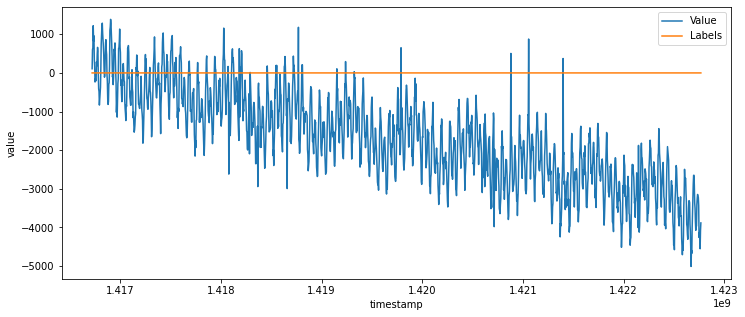

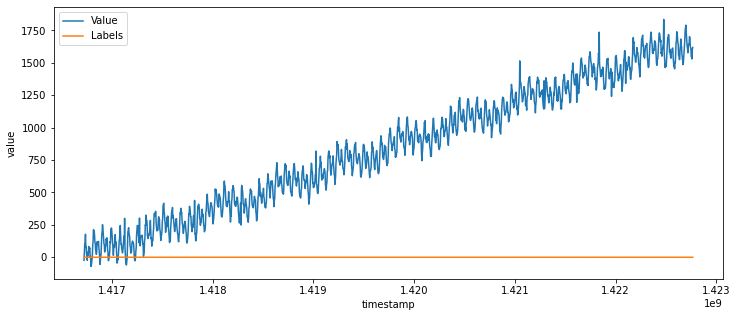

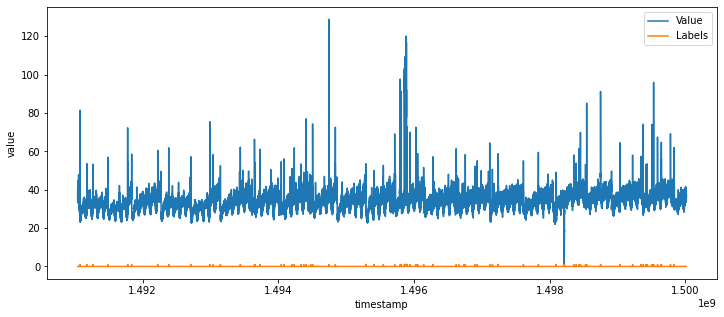

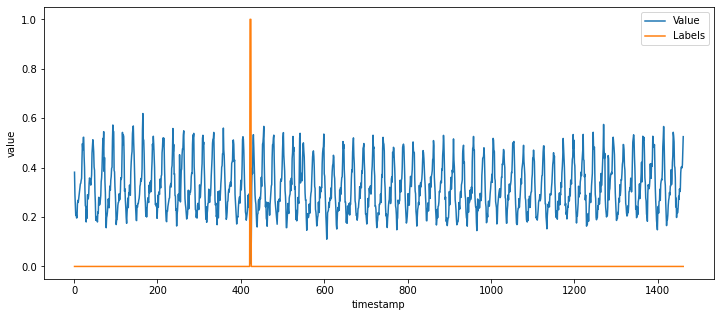

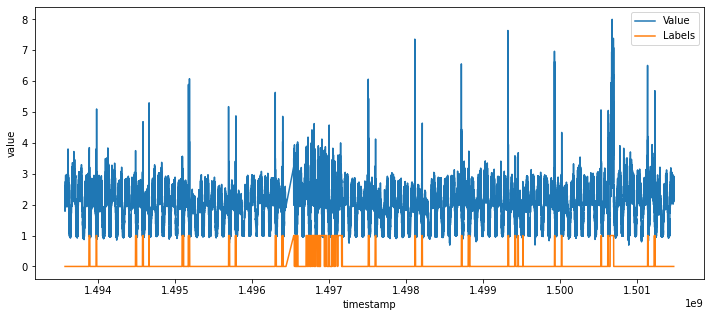

In [6]:
# show chart of 5 dataset(csv file) randomly

datasets = []
for f in all_files:
  datasets.append(pd.read_csv(f))

rnds = random.sample(range(0, len(datasets)), 5)

for i in rnds:
  plt.figure(figsize = ( 12, 5))
  sns.lineplot( x = 'timestamp',
                y = 'value',
                data = datasets[i],
                label = 'Value')
  sns.lineplot( x = 'timestamp',
                y = 'label',
                data = datasets[i],
                label = 'Labels')

In [19]:
# split data to train and test
df = pd.concat(datasets, ignore_index=True)
x = df["value"]
x = x.values.reshape(-1, 1, 1)
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Metric functions

In [8]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

In [10]:
# Simple
model = Sequential()
model.add(SimpleRNN(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0834 - f1_score_m: 0.0115 - val_loss: 0.0779 - val_f1_score_m: 0.1177
Epoch 2/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0772 - f1_score_m: 0.1128 - val_loss: 0.0770 - val_f1_score_m: 0.1134
Epoch 3/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0765 - f1_score_m: 0.1307 - val_loss: 0.0766 - val_f1_score_m: 0.1589
Epoch 4/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0761 - f1_score_m: 0.1323 - val_loss: 0.0761 - val_f1_score_m: 0.1456
Epoch 5/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0757 - f1_score_m: 0.1336 - val_loss: 0.0758 - val_f1_score_m: 0.1586
Epoch 6/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0754 - f1_score_m: 0.1318 - val_loss: 0.0760 - val_f1_score_m: 0.0209
Epoch 7/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0752 - f1_score_m: 0.1339 -

In [12]:
# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 54s 6ms/step - loss: 0.0775 - f1_score_m: 4.0745e-06 - val_loss: 0.0748 - val_f1_score_m: 0.0000e+00
Epoch 2/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0701 - f1_score_m: 0.0098 - val_loss: 0.0699 - val_f1_score_m: 0.0613
Epoch 3/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0689 - f1_score_m: 0.0591 - val_loss: 0.0680 - val_f1_score_m: 0.1003
Epoch 4/10
8869/8869 [==============================] - 50s 6ms/step - loss: 0.0680 - f1_score_m: 0.0890 - val_loss: 0.0673 - val_f1_score_m: 0.1178
Epoch 5/10
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0675 - f1_score_m: 0.1057 - val_loss: 0.0671 - val_f1_score_m: 0.1179
Epoch 6/10
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0672 - f1_score_m: 0.1154 - val_loss: 0.0671 - val_f1_score_m: 0.1182
Epoch 7/10
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0671 - f1_score_m: 

In [13]:
# GRU
model = Sequential()
model.add(GRU(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0746 - f1_score_m: 0.0150 - val_loss: 0.0705 - val_f1_score_m: 0.0410
Epoch 2/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0697 - f1_score_m: 0.0701 - val_loss: 0.0696 - val_f1_score_m: 0.0809
Epoch 3/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0686 - f1_score_m: 0.0910 - val_loss: 0.0683 - val_f1_score_m: 0.1178
Epoch 4/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0677 - f1_score_m: 0.1105 - val_loss: 0.0675 - val_f1_score_m: 0.1178
Epoch 5/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0673 - f1_score_m: 0.1221 - val_loss: 0.0673 - val_f1_score_m: 0.1313
Epoch 6/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0669 - f1_score_m: 0.1286 - val_loss: 0.0667 - val_f1_score_m: 0.1506
Epoch 7/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0668 - f1_score_m: 0.1319 -

In [21]:
# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 50s 5ms/step - loss: 0.0782 - f1_score_m: 0.0015 - val_loss: 0.0696 - val_f1_score_m: 0.0000e+00
Epoch 2/10
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0686 - f1_score_m: 0.0539 - val_loss: 0.0697 - val_f1_score_m: 0.0626
Epoch 3/10
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0676 - f1_score_m: 0.1045 - val_loss: 0.0678 - val_f1_score_m: 0.1179
Epoch 4/10
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0671 - f1_score_m: 0.1239 - val_loss: 0.0672 - val_f1_score_m: 0.1000
Epoch 5/10
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0670 - f1_score_m: 0.1289 - val_loss: 0.0685 - val_f1_score_m: 0.1312
Epoch 6/10
8869/8869 [==============================] - 44s 5ms/step - loss: 0.0668 - f1_score_m: 0.1362 - val_loss: 0.0672 - val_f1_score_m: 0.1456
Epoch 7/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0666 - f1_score_m: 0.13

# 4. Preprocces data to get better performance

In [15]:
# Preprocces method 1
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1,1)).reshape(-1,1,1)
x_test = scaler.transform(x_test.reshape(-1,1)).reshape(-1,1,1)

In [16]:
# Preprocces method 2
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1,1))
x_test = scaler.transform(x_test.reshape(-1,1))

In [20]:
# Train 3 models again
# Simple
model = Sequential()
model.add(SimpleRNN(16, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 40s 4ms/step - loss: 0.0822 - f1_score_m: 0.0075 - val_loss: 0.0784 - val_f1_score_m: 0.0594
Epoch 2/10
8869/8869 [==============================] - 45s 5ms/step - loss: 0.0778 - f1_score_m: 0.0974 - val_loss: 0.0780 - val_f1_score_m: 0.1182
Epoch 3/10
8869/8869 [==============================] - 38s 4ms/step - loss: 0.0776 - f1_score_m: 0.1185 - val_loss: 0.0780 - val_f1_score_m: 0.1310
Epoch 4/10
8869/8869 [==============================] - 39s 4ms/step - loss: 0.0775 - f1_score_m: 0.1204 - val_loss: 0.0779 - val_f1_score_m: 0.1314
Epoch 5/10
8869/8869 [==============================] - 38s 4ms/step - loss: 0.0774 - f1_score_m: 0.1251 - val_loss: 0.0778 - val_f1_score_m: 0.1319
Epoch 6/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0774 - f1_score_m: 0.1278 - val_loss: 0.0777 - val_f1_score_m: 0.1148
Epoch 7/10
8869/8869 [==============================] - 38s 4ms/step - loss: 0.0773 - f1_score_m: 0.1270 -

In [22]:
# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 50s 5ms/step - loss: 0.0782 - f1_score_m: 4.6021e-06 - val_loss: 0.0712 - val_f1_score_m: 0.0000e+00
Epoch 2/10
8869/8869 [==============================] - 50s 6ms/step - loss: 0.0703 - f1_score_m: 0.0000e+00 - val_loss: 0.0699 - val_f1_score_m: 0.0000e+00
Epoch 3/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0693 - f1_score_m: 0.0049 - val_loss: 0.0688 - val_f1_score_m: 0.0408
Epoch 4/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0684 - f1_score_m: 0.0609 - val_loss: 0.0682 - val_f1_score_m: 0.0802
Epoch 5/10
8869/8869 [==============================] - 46s 5ms/step - loss: 0.0679 - f1_score_m: 0.0960 - val_loss: 0.0686 - val_f1_score_m: 0.0806
Epoch 6/10
8869/8869 [==============================] - 48s 5ms/step - loss: 0.0675 - f1_score_m: 0.1141 - val_loss: 0.0705 - val_f1_score_m: 0.1004
Epoch 7/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0674 - f1_s

In [23]:
# GRU
model = Sequential()
model.add(GRU(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
8869/8869 [==============================] - 49s 5ms/step - loss: 0.0743 - f1_score_m: 0.0185 - val_loss: 0.0706 - val_f1_score_m: 0.0599
Epoch 2/10
8869/8869 [==============================] - 42s 5ms/step - loss: 0.0686 - f1_score_m: 0.0865 - val_loss: 0.0677 - val_f1_score_m: 0.1005
Epoch 3/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0677 - f1_score_m: 0.1100 - val_loss: 0.0674 - val_f1_score_m: 0.1202
Epoch 4/10
8869/8869 [==============================] - 47s 5ms/step - loss: 0.0669 - f1_score_m: 0.1353 - val_loss: 0.0671 - val_f1_score_m: 0.1286
Epoch 5/10
8869/8869 [==============================] - 49s 6ms/step - loss: 0.0667 - f1_score_m: 0.1434 - val_loss: 0.0671 - val_f1_score_m: 0.1503
Epoch 6/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0666 - f1_score_m: 0.1489 - val_loss: 0.0668 - val_f1_score_m: 0.1704
Epoch 7/10
8869/8869 [==============================] - 43s 5ms/step - loss: 0.0665 - f1_score_m: 0.1472 -

# 6. Train a self supervise model

In [25]:
def pred(data):
    x = []
    y = []
    for i in range(0, len(data) - 1):
        x.append(data[i])
        y.append(data[i + 1])
    return np.array(x).reshape((-1, 1)), np.array(y)

In [27]:
x_train_ssl, y_train_ssl = pred(x_train.flatten())
x_test_ssl, y_test_ssl = pred(x_test.flatten())

In [26]:
# compile and train the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=(f1_score_m,))

In [29]:
history = model.fit(x_train_ssl, y_train_ssl, epochs=5, batch_size=128, validation_data=(x_test_ssl, y_test_ssl))

Epoch 1/5
8869/8869 [==============================] - 53s 6ms/step - loss: 32793296896.0000 - f1_score_m: 0.9445 - val_loss: 33567098880.0000 - val_f1_score_m: 0.9442
Epoch 2/5
8869/8869 [==============================] - 51s 6ms/step - loss: 32792354816.0000 - f1_score_m: 0.9445 - val_loss: 33566119936.0000 - val_f1_score_m: 0.9442
Epoch 3/5
8869/8869 [==============================] - 51s 6ms/step - loss: 32791431168.0000 - f1_score_m: 0.9445 - val_loss: 33565171712.0000 - val_f1_score_m: 0.9442
Epoch 4/5
8869/8869 [==============================] - 51s 6ms/step - loss: 32790351872.0000 - f1_score_m: 0.9445 - val_loss: 33564289024.0000 - val_f1_score_m: 0.9442
Epoch 5/5
8869/8869 [==============================] - 51s 6ms/step - loss: 32789501952.0000 - f1_score_m: 0.9445 - val_loss: 33563400192.0000 - val_f1_score_m: 0.9442


In [36]:
new_model = Sequential()

In [37]:
# delete last layer of model
for layer in model.layers[:-1]: 
  new_model.add(layer)

In [38]:
# freeze all remaining layers except the last one
for layer in new_model.layers[:-1]:
    layer.trainable = False

In [39]:
# add 2 dence layer to the model
new_model.add(Dense(16, activation='relu'))

new_model.add(Dense(1, activation='sigmoid'))

In [42]:
# train the main task(anomaly detection)
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

new_model.fit(x_train_ssl, y_train_ssl, epochs=5, batch_size=128, validation_data=(x_test_ssl, y_test_ssl))

Epoch 1/5
8869/8869 [==============================] - 50s 5ms/step - loss: -9524.0615 - f1_score_m: 0.9757 - val_loss: 3.1885 - val_f1_score_m: 0.0372
Epoch 2/5
8869/8869 [==============================] - 48s 5ms/step - loss: -31625.8027 - f1_score_m: 0.9363 - val_loss: 6.4256 - val_f1_score_m: 0.0372
Epoch 3/5
8869/8869 [==============================] - 48s 5ms/step - loss: -53998.7031 - f1_score_m: 0.9363 - val_loss: 9.7552 - val_f1_score_m: 0.0372
Epoch 4/5
8869/8869 [==============================] - 47s 5ms/step - loss: -75716.8828 - f1_score_m: 0.9363 - val_loss: 13.0244 - val_f1_score_m: 0.0372
Epoch 5/5
8869/8869 [==============================] - 47s 5ms/step - loss: -97655.0156 - f1_score_m: 0.9363 - val_loss: 16.3447 - val_f1_score_m: 0.0372


# 7. Handle unbalanced data problem

In [45]:
majority = df[df["label"] == 0]
minority = df[df["label"] == 1]

downsampled = resample(majority, replace=True, random_state=42, n_samples=len(minority))

upsampled = pd.concat([downsampled, minority])
x = upsampled["value"]
x = x.values.reshape(-1, 1, 1)
y = upsampled.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [46]:
# GRU
model = Sequential()
model.add(GRU(128, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m,))

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
338/338 [==============================] - 4s 6ms/step - loss: 0.5576 - f1_score_m: 0.7519 - val_loss: 0.5181 - val_f1_score_m: 0.8027
Epoch 2/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4969 - f1_score_m: 0.8054 - val_loss: 0.4851 - val_f1_score_m: 0.8033
Epoch 3/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4735 - f1_score_m: 0.8111 - val_loss: 0.4727 - val_f1_score_m: 0.8119
Epoch 4/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4663 - f1_score_m: 0.8149 - val_loss: 0.4736 - val_f1_score_m: 0.8223
Epoch 5/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4603 - f1_score_m: 0.8166 - val_loss: 0.4598 - val_f1_score_m: 0.8183
Epoch 6/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4562 - f1_score_m: 0.8170 - val_loss: 0.4655 - val_f1_score_m: 0.8133
Epoch 7/10
338/338 [==============================] - 2s 5ms/step - loss: 0.4516 - f1_score_m: 0.8199 - val_loss: 0.4526 - v

# 8. Statistical method for anomaly detection

In [53]:
df = datasets[0]
df['z-score'] = stats.zscore(df['value'])
display(df)

,timestamp,value,label,z-score
0,1493568000,1.901639,0,-0.074118
1,1493568060,1.786885,0,-0.249654
2,1493568120,2.000000,0,0.076341
3,1493568180,1.885246,0,-0.099195
4,1493568240,1.819672,0,-0.199501
...,...,...,...,...
128557,1501475400,2.684211,0,1.122956
128558,1501475460,2.526316,0,0.881429
128559,1501475520,2.614035,0,1.015611
128560,1501475580,2.736842,0,1.203465
